# 6주차 과제

Made by 35기 코딩부장 류제현

In [3]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. 시계열데이터(주가) 분석

    1-1) 우선 삼성전자주가, 카카오주가 csv파일을 불러옵시다 

            Date를 인덱스로 설정하고, datetime으로 변환해줍니다

In [8]:
samsung = pd.read_csv("삼성전자주가.csv", index_col=0, parse_dates=True)
kakao = pd.read_csv("카카오주가.csv", index_col=0 , parse_dates=True)

    1-2) 종가(Close)를 사용하여, 종가와 함께 **삼성전자**의 120일 이동평균선과 20일 이동평균선을 그려봅시다

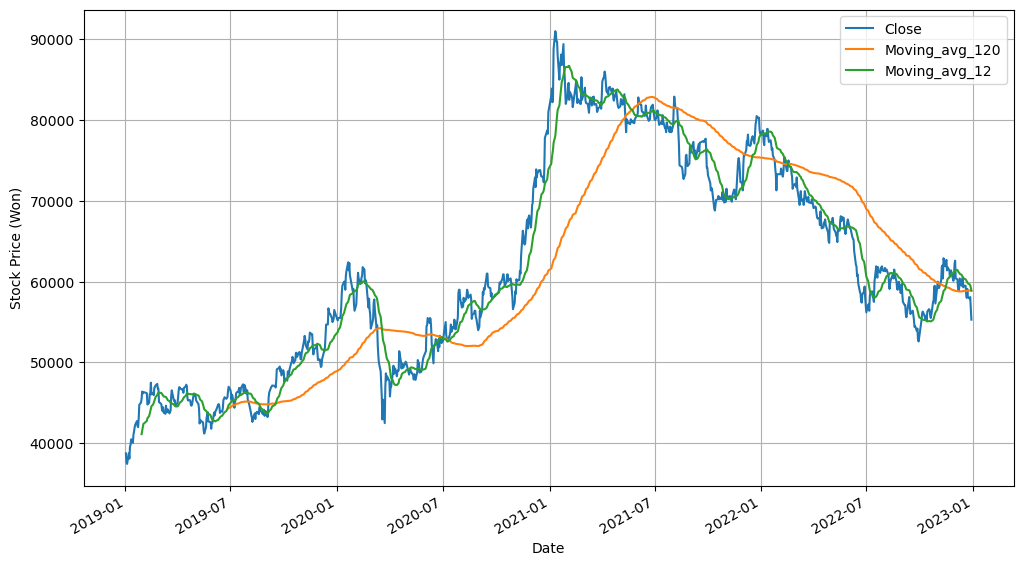

In [9]:
samsung["Moving_avg_120"] = samsung.Close.rolling(window=120).mean()
samsung["Moving_avg_12"] = samsung.Close.rolling(window=20).mean()

samsung[["Close","Moving_avg_120","Moving_avg_12"]].plot(figsize=(12,7))
plt.grid()
plt.ylabel("Stock Price (Won)");

    1-3) 카카오 주가(종가)그래프에, 볼린저 밴드를 추가해봅시다 볼린저 밴드의 공식은 아래와 같습니다 (n=20, m=2를 사용합니다)

    * 볼린저 밴드는 Matplotlib의 fill_between 함수를 사용하면 됩니다 (그림의 투명도는 alpha 매개변수로 조절합니다) (출처:investopedia.com)

![image.png](Bollinger_band.PNG)

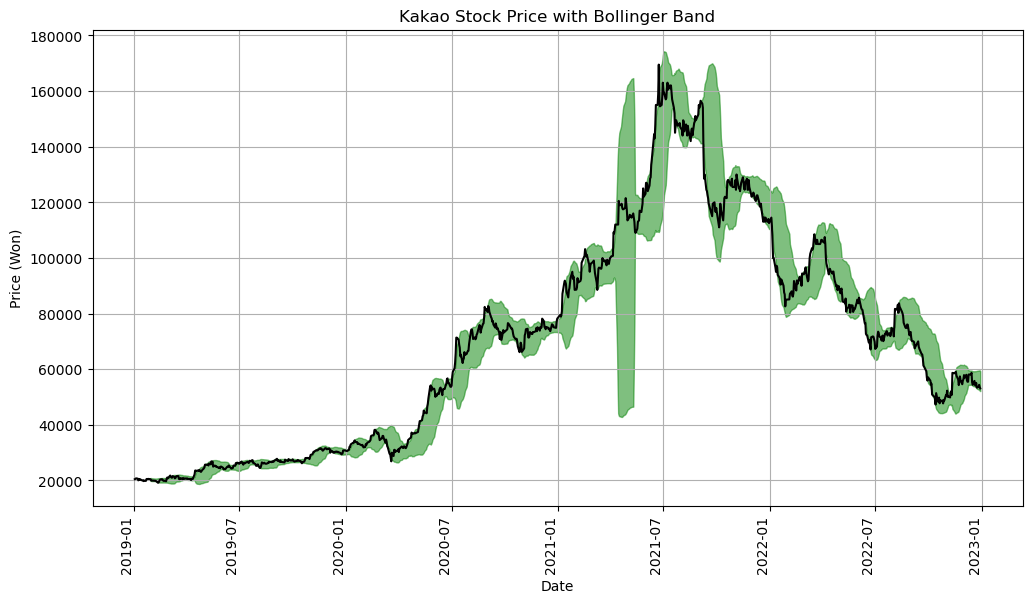

In [12]:
n = 20
m = 2

TP = (kakao.High + kakao.Low + kakao.Close) / 3 

kakao["BOLU"] = TP.rolling(window=n).mean() + m*(TP.rolling(window=n).std())
kakao["BOLD"] = TP.rolling(window=n).mean() - m*(TP.rolling(window=n).std())

plt.figure(figsize=(12,7))
kakao.Close.plot(c='k')
plt.fill_between(kakao.index, kakao.BOLU, kakao.BOLD, alpha=0.5, color='g')

plt.title("Kakao Stock Price with Bollinger Band")
plt.ylabel("Price (Won)")
plt.grid()
plt.xticks(rotation=90);

    1-4) 카카오와 삼성전자의 CAGR을 구해봅시다. 단, 년도별로 계산합니다 (Ex. 2020년:10%, 2021년:12% ...)

        결과는 데이터프레임으로 출력해주세요 / CAGR의 공식은 아래와 같습니다 (출처:위키)
        **마지막 열은 누적 CAGR(5년치)를 기록해주세요**
        

![image.png](CAGR.PNG)

In [14]:
samsung.loc["2021"]

,Close,Open,High,Low,Volume,Moving_avg_120,Moving_avg_12
Date,,,,,,,
2021-01-04,83000,81000,84400,80200,38655276,61627.500000,74585.0
2021-01-05,83900,81600,83900,81600,35335669,61886.666667,75295.0
2021-01-06,82200,83300,84500,82100,42089013,62132.500000,75830.0
2021-01-07,82900,82800,84200,82700,32644642,62378.333333,76330.0
2021-01-08,88800,83300,90000,83000,59013307,62670.000000,77185.0
...,...,...,...,...,...,...,...
2021-12-24,80500,80200,80800,80200,12086380,75388.333333,76890.0
2021-12-27,80200,80600,80600,79800,10783368,75390.000000,77285.0
2021-12-28,80300,80200,80400,79700,18226325,75389.166667,77735.0


In [16]:
value_dict = {}
for year in range(2019,2023):
    tmp_df = samsung.loc[str(year)]
    cagr = ((tmp_df.Close.iloc[-1] / tmp_df.Close.iloc[0]) -1) * 100
    # key는 년도, 값은 cagr로 딕셔너리에 담는다
    value_dict[year] = cagr

pd.Series(value_dict)

2019    44.000000
2020    46.739130
2021    -5.662651
2022   -29.643766
dtype: float64

In [18]:
def calculate_cagr(df, start:int, end:int):
    use_df = df.copy()
    value_dict = {}

    for year in range(start,end):
        tmp_df = use_df.loc[str(year)]
        cagr = ((tmp_df.Close.iloc[-1] / tmp_df.Close.iloc[0]) -1) * 100
        # key는 년도, 값은 cagr로 딕셔너리에 담는다
        value_dict[year] = cagr

    # 5년 누적 cagr계산
    cagr_all = ((df.Close.iloc[-1]  / df.Close.iloc[0]) ** (1/4) - 1) * 100
    value_dict["CAGR"] = cagr_all

    return value_dict

In [19]:
# 함수를 호출한다
cagr_kakao = calculate_cagr(kakao, 2019, 2023)
cagr_samsung = calculate_cagr(samsung, 2019, 2023)

# Cagr이 담긴 딕셔너리를 시리즈로 바꿔준다
k = pd.Series(cagr_kakao)
s = pd.Series(cagr_samsung)

# 두 시리즈를 하나의 데이터프레임으로 합쳐준다
cagr = pd.concat([k,s], axis=1, keys=["CAGR_Kakao","CAGR_Samsung"])
cagr

,CAGR_Kakao,CAGR_Samsung
2019,50.490890,44.000000
2020,155.411807,46.739130
2021,41.537920,-5.662651
2022,-53.624454,-29.643766
CAGR,26.904861,9.298287


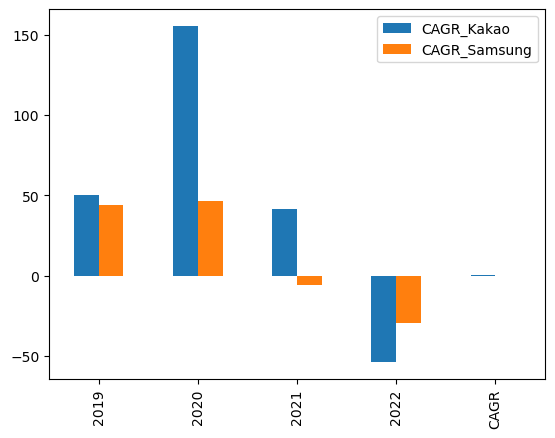

In [15]:
# CAGR 시각화
cagr.plot(kind="bar");

    1-5) Optional !! : 삼성전자 주가(종가) 그래프를 거래량과 함께 그려보세요!

    * Matplotlib을 사용해 여러 방식으로 그릴 수도 있지만, plotly라는 시각화 라이브러리를 사용하면 더 쉽게 그릴 수도 있습니다

In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots and mention plot grid size
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               subplot_titles=('OHLC', 'Volume'), vertical_spacing=0.03, 
               row_width=[0.2, 0.7])


fig.add_trace(go.Candlestick(x=samsung.index,
                             open=samsung.Open, 
                             high=samsung.High,
                             low=samsung.Low, 
                             close=samsung.Close),
                             row=1, col=1)

fig.add_trace(go.Bar(x=samsung.index, y=samsung.Volume, 
                     showlegend=False), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

## 2. 주성분 분석(PCA)과 머신러닝

    음원 스트리밍 기업 Spotify에서 받아온 실제 데이터셋을 사용해 봅시다

In [25]:
spotify = pd.read_csv("spotify.csv")
print(spotify.shape) #32833개의 Data

# 컬럼의 일부만 사용하겠습니다
spotify = spotify.loc[:,['playlist_genre', 'danceability',
                         'energy','loudness','speechiness', 'acousticness', 
                         'instrumentalness','liveness', 'valence', 'tempo']]
spotify.head()

(32833, 23)


,playlist_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,pop,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036
1,pop,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972
2,pop,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008
3,pop,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956
4,pop,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976


    2-1) playlist_genre를 기준으로 데이터셋을 합친 후, 각각 특성의 평균을 구해 봅시다. (pandas의 groupby를 사용합니다)

        * 가장 energy의 평균이 높은 음악 장르는 무엇이고 그럴듯한가요?
        * 가장 acousticness가 높은 장르는 무엇이고 그럴듯한가요? 

In [26]:
spotify

,playlist_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,pop,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036
1,pop,0.726,0.815,-4.969,0.0373,0.072400,0.004210,0.3570,0.6930,99.972
2,pop,0.675,0.931,-3.432,0.0742,0.079400,0.000023,0.1100,0.6130,124.008
3,pop,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,121.956
4,pop,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976
...,...,...,...,...,...,...,...,...,...,...
32828,edm,0.428,0.922,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170
32829,edm,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041
32830,edm,0.529,0.821,-4.899,0.0481,0.108000,0.000001,0.1500,0.4360,127.989
32831,edm,0.626,0.888,-3.361,0.1090,0.007920,0.127000,0.3430,0.3080,128.008


    2-2)  주성분 분석으로 데이터셋을 3차원으로 줄여봅시다

    * 3개의 주성분은 데이터셋의 분산을 몇 퍼센트 설명하나요? 

* 주의: 장르는 pca 모형에 넣으면 안됩니다**

In [13]:
from sklearn.decomposition import PCA

# 장르빼고 나머지만 가져오기
spotify_x = spotify.iloc[:,1:]

pca = PCA(n_components=3)
spotify_pca = pca.fit_transform(spotify_x)

sum(pca.explained_variance_ratio_) #분산의 99.9%를 설명합니다!!

0.9997904287817274

    2-3) 3개의 차원으로 줄인 데이터셋을 3차원으로 시각화해봅시다

    * scatter plot으로 그리는데, 각 point의 색상이 genre가 되도록 그리겠습니다. 아래 예시 코드가 이어집니다

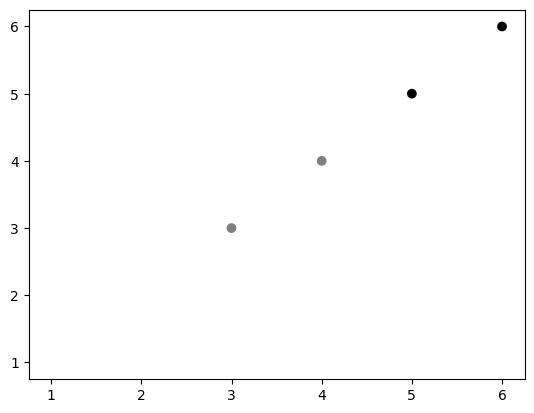

In [33]:
# 예시코드

# 데이터 생성
x = [1,2,3,4,5,6]
y = [1,2,3,4,5,6]
c = [0,0,1,1,2,2]

# 색상(c)을 하나의 색이 아닌, array로 주고, colormap을 의미하는 cmap을 지정해주변 됩니다
# 컬러맵은 다양한 것이 있는데, 여기서 확인할 수 있습니다 -> https://matplotlib.org/stable/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py 
plt.scatter(x,y,c=c, cmap="binary");

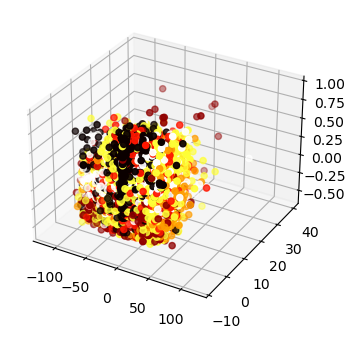

In [15]:
# PCA로 차원을 3개로 줄인 spotify 데이터셋을 시각화해봅시다

# 이 코드는 문자열로 된 장르를 숫자로 변환해줍니다(c=genre 를 해주면 되겠죠?)
genre = spotify.playlist_genre.astype('category').cat.codes

# 3d plot을 그려줍니다
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(spotify_pca[:,0], spotify_pca[:,1], spotify_pca[:,2], c=genre, cmap="hot");

    2-4) 기존 데이터셋으로, 음악 장르를 분류하는 머신러닝 모델을 만들어 봅시다 (PCA를 사용하지 않은 데이터셋으로)

**아무 알고리즘이나 사용하셔도 좋습니다!**
    
    * Train-set과 Test-set으로 데이터셋을 분리해주세요 (sklearn의 train_test_split(X_data, y_data, stratify=y_data) 꼴로 분리해주세요)
    * 1. 학습시간이 얼마나 걸렸나요?
    * 2. Test-set에 대한 정확도는 얼마인가요?

In [16]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(spotify_x.values, genre.values, stratify=genre)


# 모델 학습
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
t0 = time.time()
random_clf.fit(X_train, y_train)
t1 = time.time()

# 소요시간 출력
t1-t0

8.087682962417603

In [17]:
# Test-set에 대한 예측 정확도 
random_clf.score(X_test, y_test)

0.5429406748690462

    2-4) PCA로 차원을 3개로 줄인 데이터셋을 사용하여, 음악 장르를 분류하는 머신러닝 모델을 만들어 봅시다

**앞에서 사용한 알고리즘과 동일한 알고리즘을 사용해주세요!**
    
    # PCA를 사용해, 앞에서 train-test-split으로 분리한 데이터를 3개의 차원으로 축소해주세요
    * 1. 학습시간이 얼마나 걸렸나요?
    * 2. Test-set에 대한 정확도는 얼마인가요?

In [18]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 모델 학습
pca_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
t0 = time.time()
pca_clf.fit(X_train_pca, y_train)
t1 = time.time()

# 소요시간 출력
t1-t0

6.9596734046936035

In [19]:
# Test-set에 대한 예측 정확도 
pca_clf.score(X_test_pca, y_test)

0.39529784382994276